# Logistic Regression Notebook
[Return to project overview](final_project_overview.ipynb)

### Andrew Larimer, Deepak Nagaraj, Daniel Olmstead, Michael Winton (W207-4-Summer 2018 Final Project)

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import util
from util import our_train_test_split

# set default options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

%matplotlib inline

## Load data and split class labels into separate array

Our utility function reads the merged dataset, imputes the column mean for missing numeric values, and then performs a stratified train-test split.

In [2]:
# read the "production" version of the cleaned & merged dataset
train_data_orig, test_data_orig, train_labels, test_labels = util.read_data(do_imputation=True)
print(train_data_orig.shape)
print(train_labels.shape)

Train: 371 observations (positive class fraction: 0.232)
Test : 93 observations (positive class fraction: 0.226)
(371, 75)
(371,)


Filter to the columns that we will use in the model.  `district` and `zip`, while numeric, do not hold mathematical meaning and reduce accuracy and interpretability (it makes no sense to say that the higher or lower your district, the more or less likely you are to be a high-registering school).  `school_income_estimate` is too sparse to be be useful.  These columns are dropped from the model.

In [3]:
features_to_keep = [
                    #'district', 
                    #'zip',
                    'community_school', 
                    'economic_need_index', 
                    #'school_income_estimate',
                    'grade_7_enrollment',
                    'percent_ell', 
                    'percent_asian', 
                    'percent_black', 
                    'percent_hispanic',
                    'percent_black__hispanic', 
                    'percent_white', 
                    'student_attendance_rate',
                    'percent_of_students_chronically_absent',
                    'rigorous_instruction_percent', 
                    'rigorous_instruction_rating',
                    'collaborative_teachers_percent', 
                    'collaborative_teachers_rating',
                    'supportive_environment_percent', 
                    'supportive_environment_rating',
                    'effective_school_leadership_percent',
                    'effective_school_leadership_rating',
                    'strong_family_community_ties_percent',
                    'strong_family_community_ties_rating', 
                    'trust_percent', 
                    'trust_rating',
                    'student_achievement_rating', 
                    'average_ela_proficiency',
                    'average_math_proficiency', 
                    'grade_7_ela_all_students_tested',
                    'grade_7_ela_4s_all_students',
                    'grade_7_ela_4s_american_indian_or_alaska_native',
                    'grade_7_ela_4s_black_or_african_american',
                    'grade_7_ela_4s_hispanic_or_latino',
                    'grade_7_ela_4s_asian_or_pacific_islander', 
                    'grade_7_ela_4s_white',
                    'grade_7_ela_4s_multiracial',
                    'grade_7_ela_4s_limited_english_proficient',
                    'grade_7_ela_4s_economically_disadvantaged',
                    'grade_7_math_all_students_tested', 
                    'grade_7_math_4s_all_students',
                    'grade_7_math_4s_american_indian_or_alaska_native',
                    'grade_7_math_4s_black_or_african_american',
                    'grade_7_math_4s_hispanic_or_latino',
                    'grade_7_math_4s_asian_or_pacific_islander', 
                    'grade_7_math_4s_white',
                    'grade_7_math_4s_multiracial',
                    'grade_7_math_4s_limited_english_proficient',
                    'grade_7_math_4s_economically_disadvantaged',
                    'sie_provided',
                    'in_bronx',
                    'in_brooklyn',
                    'in_manhattan',
                    'in_queens',
                    'in_staten',
                    'number_of_students_english', 
                    'number_of_students_math',
                    'number_of_students_science', 
                    'number_of_students_social_studies',
                    'number_of_classes_english', 
                    'number_of_classes_math',
                    'number_of_classes_science', 
                    'number_of_classes_social_studies',
                    'average_class_size_english', 
                    'average_class_size_math',
                    'average_class_size_science',
                    'average_class_size_social_studies',
                    'school_pupil_teacher_ratio',
                    'gifted',
                    'selective'
                   ]

train_data = train_data_orig[features_to_keep]
test_data = test_data_orig[features_to_keep]
train_data.head()

community_school  economic_need_index  grade_7_enrollment  percent_ell  \
421               0.0                0.708               168.0         18.0   
344               0.0                0.667                61.0          2.0   
279               0.0                0.780               106.0         14.0   
244               0.0                0.797                49.0          4.0   
379               0.0                0.796               120.0         15.0   

     percent_asian  percent_black  percent_hispanic  percent_black__hispanic  \
421           11.0           48.0              17.0                     64.0   
344            6.0           11.0              77.0                     89.0   
279            2.0           68.0              28.0                     96.0   
244            6.0           77.0              15.0                     92.0   
379           23.0           18.0              56.0                     74.0   

     percent_white  student_attendance_rate  \
421           24.0                     92.0   
344            5.0                     97.0   
279            2.0                     90.0   
244            1.0                     92.0   
379            1.0                     92.0   

     percent_of_students_chronically_absent  rigorous_instruction_percent  \
421                                    29.0                          86.0   
344                                     8.0                          92.0   
279                                    33.0                          86.0   
244                                    24.0                          89.0   
379                                    29.0                          93.0   

     rigorous_instruction_rating  collaborative_teachers_percent  \
421                          3.0                            91.0   
344                          4.0                            99.0   
279                          3.0                            96.0   
244                          3.0                            86.0   
379                          3.0                            95.0   

     collaborative_teachers_rating  supportive_environment_percent  \
421                            3.0                            80.0   
344                            4.0                            96.0   
279                            3.0                            83.0   
244                            3.0                            83.0   
379                            3.0                            80.0   

     supportive_environment_rating  effective_school_leadership_percent  \
421                            3.0                                 86.0   
344                            4.0                                 92.0   
279                            3.0                                 93.0   
244                            2.0                                 80.0   
379                            2.0                                 93.0   

     effective_school_leadership_rating  strong_family_community_ties_percent  \
421                                 3.0                                  71.0   
344                                 4.0                                  83.0   
279                                 4.0                                  80.0   
244                                 3.0                                  82.0   
379                                 4.0                                  79.0   

     strong_family_community_ties_rating  trust_percent  trust_rating  \
421                                  2.0           92.0           3.0   
344                                  3.0           98.0           4.0   
279                                  3.0           95.0           4.0   
244                                  2.0           85.0           2.0   
379                                  3.0           91.0           3.0   

     student_achievement_rating  average_ela_proficiency  \
421                         3.0     

## Hyperparameter Tuning
Find the optimal C-score and penalty using GridSearchCV.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

lr = LogisticRegression(random_state=207)
penalty = ['l1', 'l2']
C = [0.01, 0.05, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 1.000, 2.000, 3.000, 4.000]
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(train_data_scaled, train_labels)
best_penalty = best_model.best_estimator_.get_params()['penalty']
best_c = best_model.best_estimator_.get_params()['C']
print('Best Penalty:', best_penalty)
print('Best C:', best_c)

Best Penalty: l2
Best C: 0.05


## Make Pipeline and K-fold validation
Using five k-folds and the optimal hyperparameters from above, determine the overall accuracy and F1 score for the model.

In [5]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(C=best_c, penalty=best_penalty, random_state=207))
k_folds = 5
cv_scores = cross_validate(pipe, train_data, train_labels, cv=k_folds, scoring=['accuracy','f1'])
cv_f1 = cv_scores['test_f1'].mean()
util.print_cv_results(cv_scores)

With 5-fold cross-validation, accuracy is: 0.846 (95% CI from 0.771 to 0.921).
The F1 score is: 0.660 (95% CI from 0.467 to 0.853).


## Apply model to the test set
Check for overfitting by applying the model to the test set and reporting back accuracy and F1 score.

In [6]:
import sklearn.metrics as metrics

lr = LogisticRegression(C=best_c, penalty=best_penalty, random_state=207)
train_data_scaled, test_data_scaled = scaler.fit_transform(train_data), scaler.fit_transform(test_data)
lr.fit(train_data_scaled, train_labels)
predicted_labels = lr.predict(test_data_scaled)
lr_score_accuracy = metrics.accuracy_score(test_labels, predicted_labels)
lr_score_f1 = metrics.f1_score(test_labels, predicted_labels)

print("On the test set, the model has an accuracy of {:.2f}% and an F1 score of {:.2f}."
     .format(lr_score_accuracy*100, lr_score_f1))


On the test set, the model has an accuracy of 88.17% and an F1 score of 0.72.


## Examine coefficients
For a better understanding of the model, including which factors are most important for predicting a high-registering school, we turn to an analysis of the model coefficients.  As the goal here is not prediction but comprehension, the first step is to recombine the data into a set that contains 100% of the schools.

In [7]:
# recombine train and test data into an aggregate dataset
X_orig = pd.concat([train_data_orig, test_data_orig])
X_i = pd.concat([train_data, test_data])
y = np.concatenate((train_labels,test_labels))
X_pos = X_i[y==1]
X_neg = X_i[y==0]

The next step is to determine which coefficients are the most influential in determining the model's predictions.  These values can change quite a bit from one training set to the next, so to get a better sense of their expected value, we run a Repeated Stratified K-Fold validation, which runs five iterations of training the model on 4/5ths of the data, and then predicting the final 1/5th.  The combinations are then re-randomized, and the validation is run a total of 10 times.  This results in 50 calculations of the coefficients, which are then averaged and sorted to see which are the most influential in predicting a high registration school (positive coefficient), and which are the most influential in predicting a low-registration school (negative coefficient).

While we are running through all these trials, we also collect some other information:
 - The set of predictions, 1's or 0's, for the fifth of the model that gets tested on each iteration.  We use this as a measure of confidence in the model's predictions for the final recommendation.
 - The set of probabilities that each school will be a 1 or a 0, which are then averaged.  We use these to sort the schools by confidence later in the coefficient analysis.

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Scale the full dataset and make numpy arrays of both the data and labels
np_train_data = np.array(scaler.fit_transform(X_i))
np_train_labels = y

# Run k-fold cross-validation with 5 folds 10 times, which means every school is predicted 10 times.
folds = 5
repeats = 10
rskf = RepeatedStratifiedKFold(n_splits=folds, n_repeats= repeats, random_state=207)
fold_list = []

# Build multiple empty dataframes from the results, with columns for each k-fold
for f in range(1, (folds*repeats)+1):
    fold_list.append('k{}'.format(f))
# This contains the coefficients for every feature in every test
coefs = pd.DataFrame(index=train_data.columns, columns=fold_list)
# This contains the predicted value for each school tested (20% of the dataset each time)
predictions = pd.DataFrame(index=X_i.index, columns = fold_list)
# This contains the probabilities that each tested school will be a 0 or a 1, for use in later analysis
probs_0 = pd.DataFrame(index=X_i.index, columns = fold_list)
probs_1 = pd.DataFrame(index=X_i.index, columns = fold_list)

# Iterate through the Repeated Stratified K Fold, and and fill out the DataFrames
counter = 1
for train, test in rskf.split(np_train_data, np_train_labels):
    log = LogisticRegression(C=best_c, penalty=best_penalty, random_state=207)
    log.fit(np_train_data[train], np_train_labels[train])
    predicted_labels = log.predict(np_train_data[test])
    predicted_probs = log.predict_proba(np_train_data[test])
    coefs['k{}'.format(counter)] = log.coef_[0]
    predictions.iloc[test, counter-1] = predicted_labels
    probs_0.iloc[test, counter-1] = predicted_probs[:,0]
    probs_1.iloc[test, counter-1] = predicted_probs[:,1]
    counter += 1

# Find the average coefficient across all 50 regressions, and sort descending
coefs['avg'] = coefs.mean(axis=1)
sorted_coefs = coefs.sort_values(by='avg', ascending=False)
sorted_coefs

k1        k2  \
average_math_proficiency                          0.210923  0.313610   
percent_asian                                     0.238551  0.250576   
grade_7_ela_4s_hispanic_or_latino                 0.242705  0.250241   
average_ela_proficiency                           0.224323  0.287583   
in_brooklyn                                       0.190386  0.232668   
strong_family_community_ties_percent              0.194496  0.170148   
sie_provided                                      0.245102  0.156369   
grade_7_ela_4s_all_students                       0.141225  0.154380   
student_attendance_rate                           0.220538  0.149783   
grade_7_math_4s_all_students                      0.147903  0.141125   
grade_7_ela_4s_asian_or_pacific_islander          0.132822  0.151050   
grade_7_math_4s_asian_or_pacific_islander         0.134482  0.149131   
in_bronx                                          0.153464  0.105553   
grade_7_math_4s_black_or_african_american         0.246179  0.043363   
gifted                                            0.119190  0.114919   
grade_7_math_4s_economically_disadvantaged        0.107453  0.067990   
grade_7_ela_4s_limited_english_proficient         0.098272  0.112481   
average_class_size_science                        0.029585  0.067132   
effective_school_leadership_percent               0.056626  0.152132   
community_school                                  0.108279  0.121706   
average_class_size_social_studies                 0.044952  0.096553   
grade_7_ela_4s_economically_disadvantaged         0.035340  0.053850   
collaborative_teachers_rating                     0.049033  0.031930   
grade_7_math_4s_white                             0.039802  0.034569   
student_achievement_rating                        0.100115  0.035026   
number_of_classes_science                         0.046428  0.064714   
grade_7_enrollment                                0.044943  0.050818   
grade_7_ela_4s_white                              0.016908  0.012365   
grade_7_math_4s_multiracial                       0.036326  0.066020   
number_of_students_science                        0.036187  0.048108   
trust_percent                                     0.048838  0.032905   
rigorous_instruction_percent                     -0.008524  0.062905   
number_of_students_math                           0.051540  0.002548   
school_pupil_teacher_ratio                        0.033815  0.049874   
percent_black                                    -0.021098  0.031307   
number_of_classes_social_studies                 -0.010418  0.014164   
supportive_environment_percent                    0.004306  0.013878   
collaborative_teachers_percent                   -0.002566  0.038945   
average_class_size_math                          -0.065257 -0.037872   
grade_7_ela_4s_multiracial                       -0.042331  0.097485   
number_of_students_social_studies                -0.022923 -0.002796   
number_of_classes_math                           -0.011389 -0.022687   
strong_family_community_ties_rating               0.044822 -0.094621   
grade_7_math_4s_limited_english_proficient       -0.063231 -0.069732   
number_of_students_english                       -0.005330 -0.026127   
percent_ell                                      -0.007513 -0.014704   
economic_need_index                              -0.100746 -0.075415   
grade_7_ela_all_students_tested                  -0.039774 -0.049774   
average_class_size_english                       -0.045723 -0.025958   
grade_7_math_all_students_tested                 -0.035531 -0.047752   
grade_7_ela_4s_american_indian_or_alaska_native  -0.029252 -0.111701   
grade_7_ela_4s_black_or_african_american         -0.123725 -0.096014   
in_manhattan                                     -0.044026 -0.118795   
rigorous_instruction_rating                      -0.022076 -0.067726   
number_of_classes_english                        -0.066620 -0.075920   
supportive_environment_r

## Distributions
### Most positively-influential features
Using the average coefficients, we can discover the features that have the greatest effect in predicting both a 1 (positive) or a zero (negative).  Histograms can show us the different distributions for high-registering and low-registering schools in these categories.

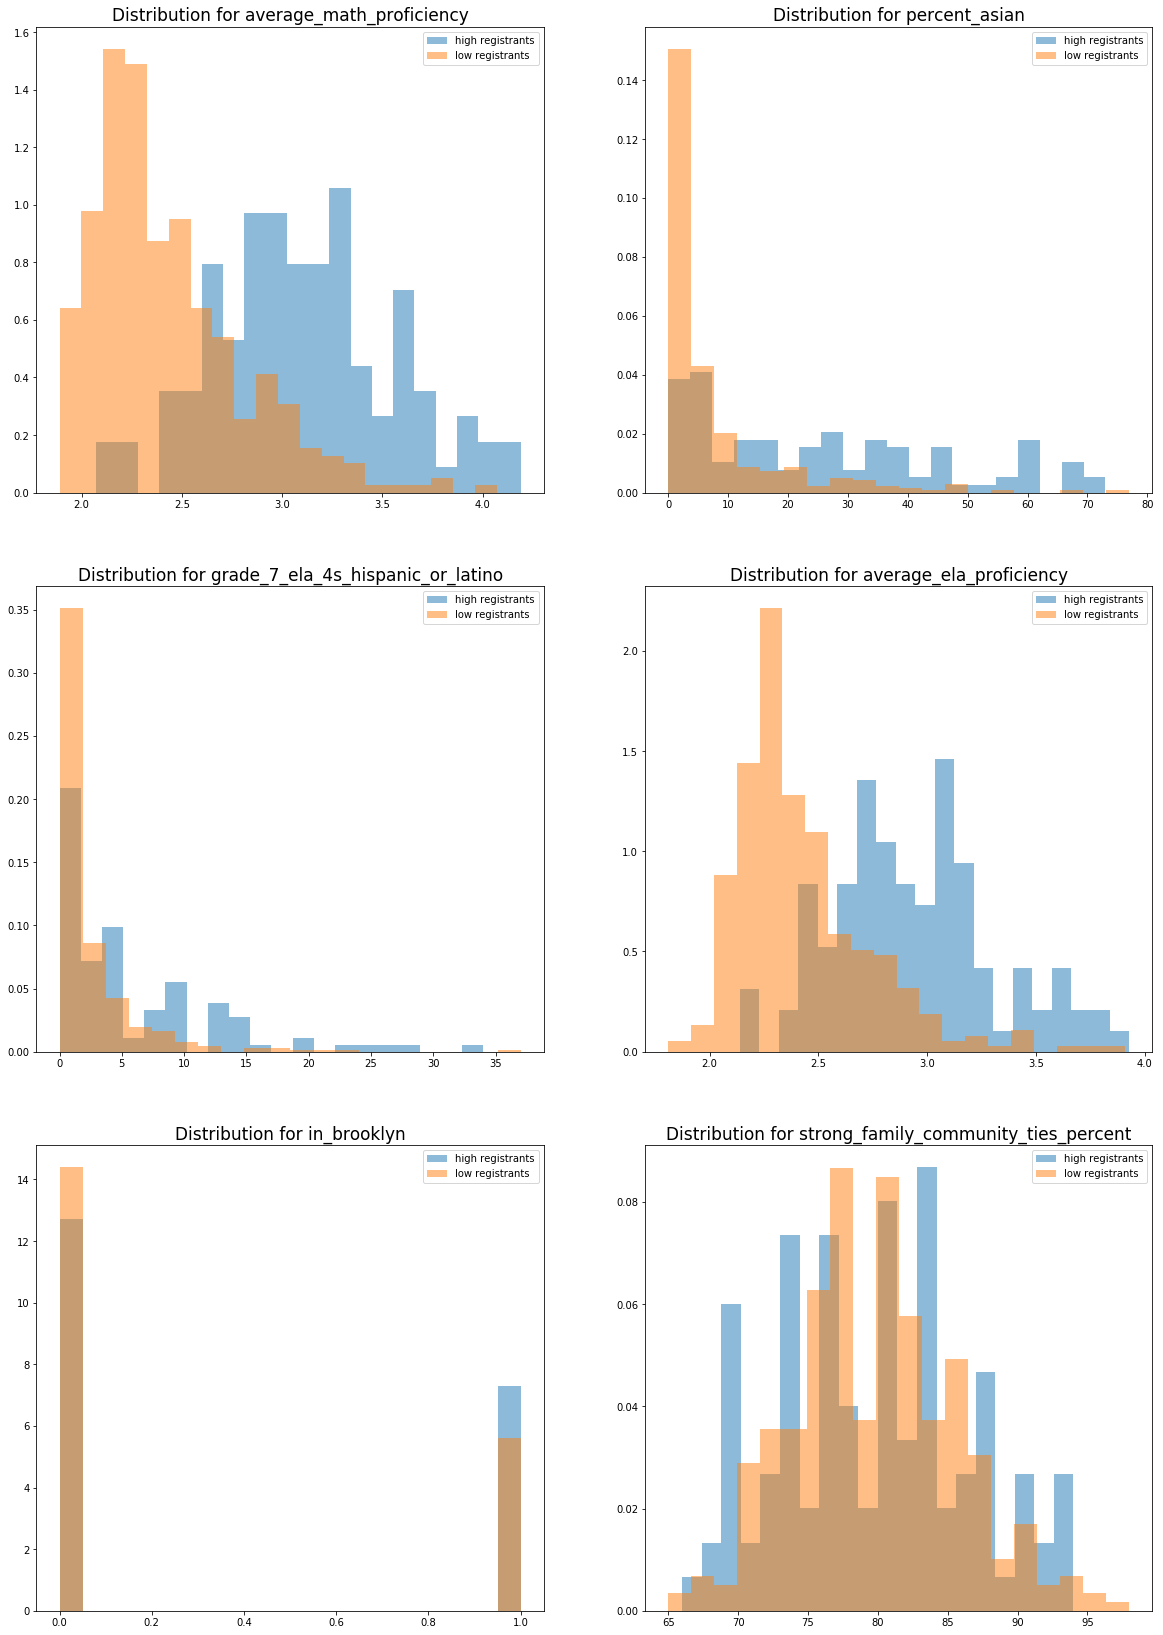

In [9]:
# Get the top and bottom 5 most influential coefficients
top_features, bottom_features = list(sorted_coefs.index[:6]), list(sorted_coefs.index[-6:])
fig = plt.figure(figsize=(20,60))
for c in top_features:
    ax = fig.add_subplot(6,2,top_features.index(c)+1)
    ax.set_title('Distribution for {}'.format(c), fontsize=17)
    ax.hist(X_pos[c], bins=20, alpha=0.5, label="high registrants", density=True)
    ax.hist(X_neg[c], bins=20, alpha=0.5, label="low registrants", density=True)
    ax.legend()
plt.show()

Unsurprisingly, `average_math_proficiency` and `average_ela_proficiency` are both strong predictors of a school with high SHSAT registrations.  From conversations with New York parents, `percent_asian` is also unsurprising as that subpopulation has a reputation for aggressively pursuing registration in specialized high school.  The `grade_7_ela_4s_hispanic_or_latino` is a puzzle, particularly since `grade_7_math_4s_hispanic_or_latino` has a fairly high *negative* coefficient.  The distribution of all of these shows strong separation between the high-registration and low-registration groups.  `in_brooklyn` does not look like it should be as influential as it is, and `strong_family_community_ties_percent`, while making intuitive sense, looks basically like two normal distributions around the same mean with different standard deviations.

### Most negatively-influential features

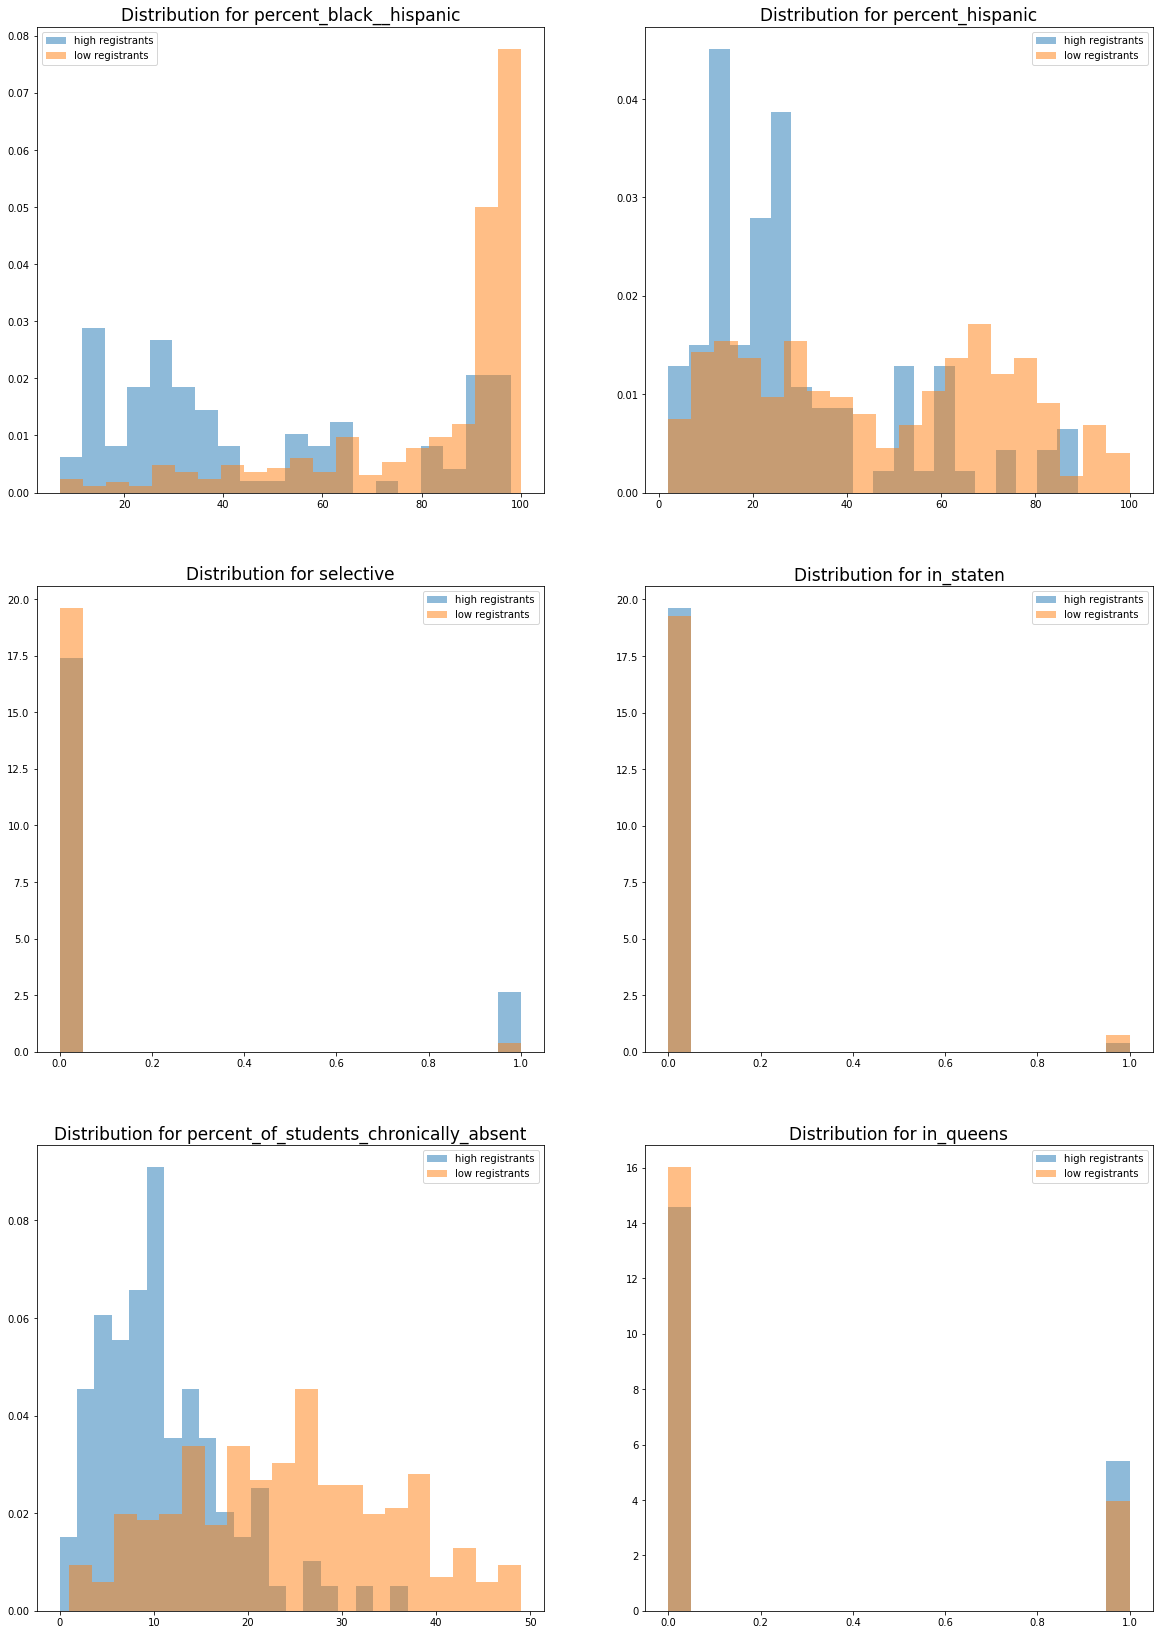

In [10]:
fig = plt.figure(figsize=(20,60))
for c in bottom_features:
    ax = fig.add_subplot(6,2,bottom_features.index(c)+1)
    ax.set_title('Distribution for {}'.format(c), fontsize=17)
    ax.hist(X_pos[c], bins=20, alpha=0.5, label="high registrants", density=True)
    ax.hist(X_neg[c], bins=20, alpha=0.5, label="low registrants", density=True)
    ax.legend()
plt.show()

The presence of `percent_black__hispanic` and `percent_hispanic` on this list reinforces PASSNYC's mission:  clearly the higher the share of these groups in a school, the less likely they are to have high test registrations.  The three dummy variables, `in_queens`, `in_staten` and `selective`, again don't look as influential as they are, while `percent_of_students_chronically_absent` makes both intuitive and visual sense as a predictor of registration level.

The fact that `grade_7_ela_4s_hispanic_or_latino` and `grade_7_math_4s_hispanic_or_latino` have nearly opposite coefficients warrants some further investigation.  If we simply plot the two groups against each other, we can see they both have strong correlation--albeit it is stronger among high registrants, perhaps reflecting a greater difference in language skills than math skills between the two groups.

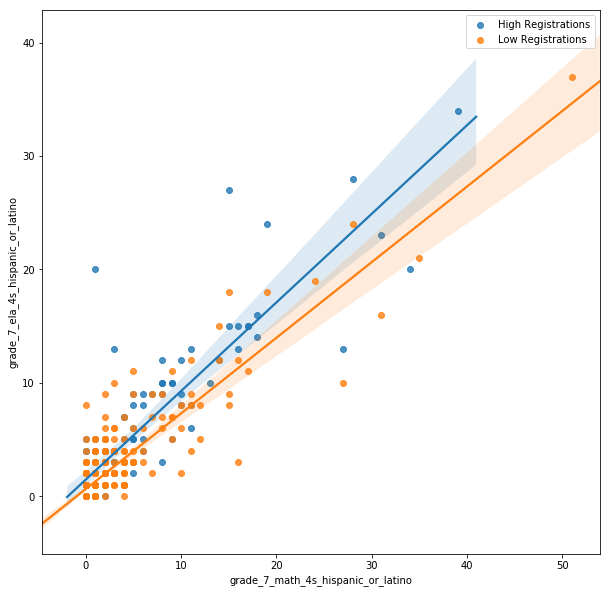

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.regplot(X_pos.grade_7_math_4s_hispanic_or_latino, X_pos.grade_7_ela_4s_hispanic_or_latino, label="High Registrations")
ax = sns.regplot(X_neg.grade_7_math_4s_hispanic_or_latino, X_neg.grade_7_ela_4s_hispanic_or_latino, label="Low Registrations")
ax.legend()

And if we plot a single-variable logistic regression for each of them against the target variable, we can see that they are, in fact, independently positive predictors.

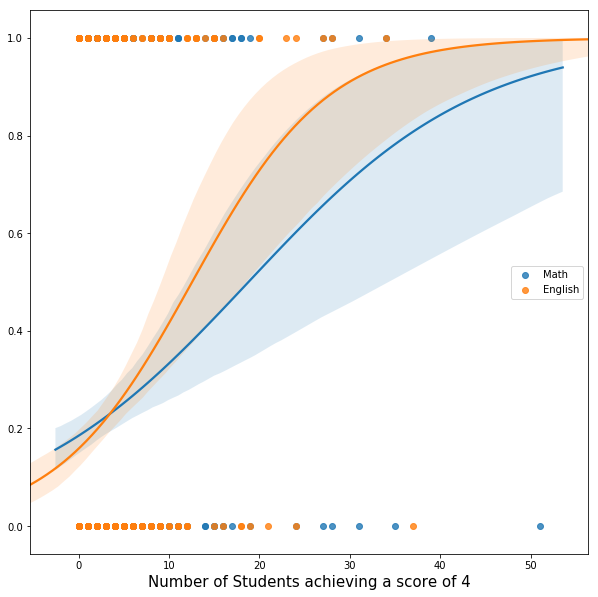

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(X_i.grade_7_math_4s_hispanic_or_latino, y, logistic=True, label="Math")
ax = sns.regplot(X_i.grade_7_ela_4s_hispanic_or_latino, y, logistic=True, label="English")
ax.set_xlabel('Number of Students achieving a score of 4', fontsize=15)
ax.legend()

It must be, therefore, that the bulk of the positive variation that `grade_7_math_4s_hispanic_or_latino` is covered by other variables (perhaps the ela scores), and all that is left in a multivariate logistic regression is the negative variation.

It is also interesting to plot the Asian and Hispanic demographics against each other independently.

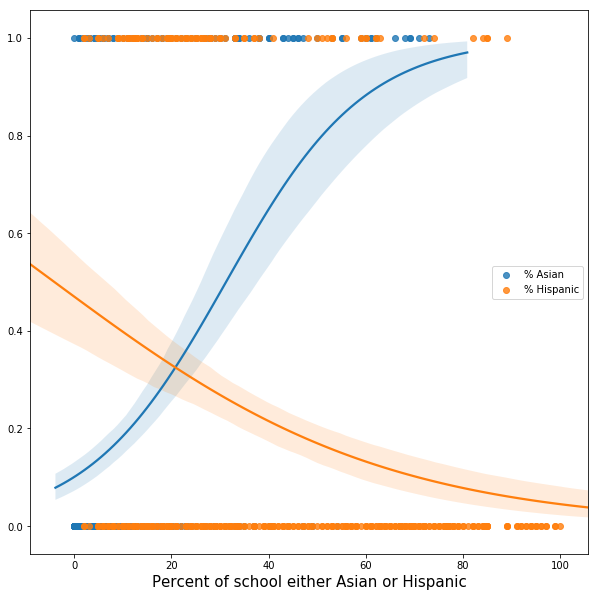

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(X_i.percent_asian, y, logistic=True, label="% Asian")
ax = sns.regplot(X_i.percent_hispanic, y, logistic=True, label="% Hispanic")
ax.set_xlabel('Percent of school either Asian or Hispanic', fontsize=15)

ax.legend()

The `percent_asian` has a steep curve, crossing the key .5 level at about 30%, while `percent_hispanic` starts at .5 and drops from there, suggesting that a school with *any* level of Hispanic population could benefit from PASSNYC's programs.

Another interesting plot is the `economic_need_index` distribution, which certainly **looks** predictive, however its average coefficient is very low, only -.04 (compared to -.1 or lower for the more influential features).  Like the Hispanic/Latino Math and ELA scores, this suggests that the variation contained in this feature has a high level of overlap with another feature--the correlation work in the EDA section of this analysis suggests that is probably `percent_black__hispanic`.

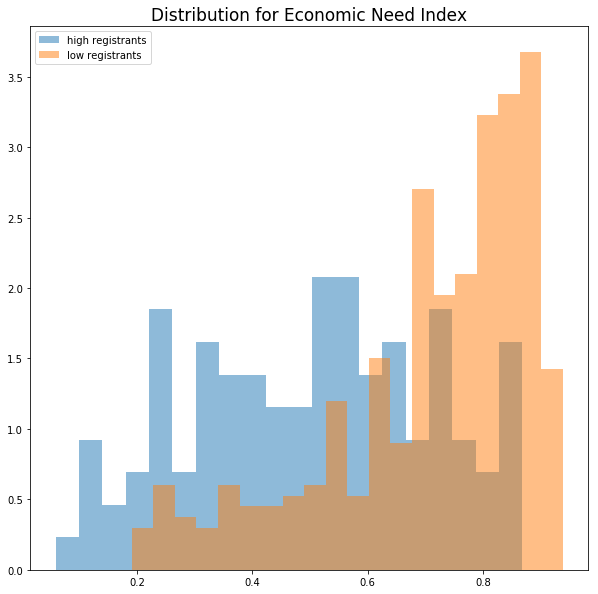

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Distribution for {}'.format('Economic Need Index'), fontsize=17)
ax.hist(X_pos['economic_need_index'], bins=20, alpha=0.5, label="high registrants", density=True)
ax.hist(X_neg['economic_need_index'], bins=20, alpha=0.5, label="low registrants", density=True)
ax.legend()

### Heatmap Analysis
While it is useful to see which variables carry the most influence in aggregate, it can be puzzling to understand why some schools make the cut and some don't.  To see the variation on a per-school level, we can build a heatmap that contextualizes each school's data, and shows which variables pull the school in one direction or another in the eyes of the model.

In [15]:
# Create columns in the predictions DataFrame to show the number of times the model voted each school a 1 or a zero
predictions['1s'] = predictions.iloc[:,:50].sum(axis=1)
predictions['0s'] = (predictions.iloc[:,:50]==0).sum(axis=1)
# Add a column to show the true status of the school
predictions['true'] = y
# Add two more columns to show the average probability of each school being a 1 or a 0.  This gives us finer-grained visibility.
predictions['1_prob'] = probs_1.mean(axis=1)
predictions['0_prob'] = probs_0.mean(axis=1)
# Sort table by the probability of school being predicted a 1
predictions = predictions.sort_values(by='1_prob', ascending=False)

In [16]:
# Create a table of raw results, along with the number of votes each received and the true value
X_predicted = pd.concat([X_i, predictions['1s'], predictions['0s'], predictions['true'], 
                         predictions['1_prob']], axis=1, join_axes=[X_i.index])
# Sort by the probability that each school got a 
X_predicted = X_predicted.sort_values(by=['1_prob'], ascending=False)

# Normalize the values of the data columns
scaled_X_predicted = scaler.fit_transform(X_predicted)
# Multiply the normalized value by the average coefficient to get a weighted influence score
avg_coefs = np.array(coefs['avg'])
weighted_values = np.multiply(scaled_X_predicted[:, :-4], avg_coefs)
# Make a new copy of the results dataframe, and paste in the scaled values for the data columns
X_result_weighted = X_predicted.copy()
X_result_weighted.iloc[:, :-4] = weighted_values
# Manually scale the vote columns to between -1.5 and 1.5 so they don't overweight the heatmap
X_result_weighted.iloc[:, -4:-3] = predictions['1_prob']
X_result_weighted.iloc[:, -3:-2] = predictions['0_prob']

# Check the variation in every column, and drop the columns that don't show much effect on the result
drop_cols = ['1_prob']
for c in X_result_weighted.columns:
    if X_result_weighted[c].max() - X_result_weighted[c].min() < .6:
        drop_cols.append(c)
X_result_weighted_trimmed = X_result_weighted.drop(drop_cols, axis=1)
X_result_weighted_trimmed.head()

percent_asian  student_attendance_rate  \
0        0.909506                 0.297259   
5        0.246215                 0.171075   
6        0.546275                 0.234167   
8        0.893713                 0.234167   
14       0.214630                 0.171075   

    percent_of_students_chronically_absent  \
0                                 0.365614   
5                                 0.250052   
6                                 0.269312   
8                                 0.307833   
14                                0.211531   

    strong_family_community_ties_percent  average_ela_proficiency  \
0                              -0.120224                 0.721274   
5                              -0.313898                 0.519544   
6                              -0.313898                 0.329021   
8                              -0.152503                 0.312210   
14                             -0.217061                 0.306606   

    average_math_proficiency  grade_7_ela_4s_all_students  \
0                   0.842092                     1.216053   
5                   0.638044                     1.285758   
6                   0.407836                     0.495763   
8                   0.433996                     0.460910   
14                  0.386907                     0.815246   

    grade_7_ela_4s_american_indian_or_alaska_native  \
0                                          0.005677   
5                                          0.005677   
6                                          0.005677   
8                                          0.005677   
14                                         0.005677   

    grade_7_ela_4s_hispanic_or_latino  \
0                           -0.142504   
5                            0.622462   
6                           -0.142504   
8                            0.287790   
14                           0.526842   

    grade_7_ela_4s_asian_or_pacific_islander  \
0                                   1.576786   
5                                   0.653615   
6                                   0.568726   
8                                   0.727893   
14                                  0.452003   

    grade_7_ela_4s_limited_english_proficient  \
0                                   -0.008106   
5                                   -0.008106   
6                                    1.245562   
8                                    1.245562   
14                                  -0.008106   

    grade_7_ela_4s_economically_disadvantaged  grade_7_math_4s_all_students  \
0                                    0.581643                      1.048096   
5                                    0.607364                      1.044391   
6                                    0.303865                      0.714655   
8                                    0.216416                      0.518295   
14                                   0.396458                      0.896195   

    grade_7_math_4s_american_indian_or_alaska_native  \
0                                           0.009588   
5                                           0.009588   
6                                           0.009588   
8                                           0.009588   
14                                          0.009588   

    grade_7_math_4s_black_or_african_american  \
0                                   -0.039891   
5                                    0.144833   
6                                   -0.039891   
8                                    0.218722   
14                                   1.179286   

    grade_7_math_4s_hispanic_or_latino  \
0                             0.047442   
5                            -0.235178   
6                             0.047442   
8                            -0.109569   
14                           -0.235178   

    grade_7_math_4s_asian_or_pacific_islander  grade_7_math_4s_white  \
0                                    1.253791               0.271732   
5 

While the data for each school is clear enough to understand, it can be difficult to place each datapoint in context in the greater scheme of things.  Is that number a lot, or a little?  To aid in visualizing this, we constructed a heatmap that colors each datapoint according to the degree of influence it has in determining the model's final evaluation.

For this heatmap, the numbers in each cell are the raw data, but the coloration comes from the weighted and trimmed data generated above.  Each datapoint is normalized so they are all in the same basic range, and then they are multiplied by their average coefficient - effectively weighting them according to their influence in the model.  Columns in which there is very little variation are dropped for the sake of simplification, and everything is laid out in order of the likelihood that each school will be predicted to be a high-registration school.

Looking across the row for each school, you can see which columns pulled that school towards a `1` prediction by the degree to which the color is yellow, while columns colored blue to black pull the school towards a 0.  Looking down the columns, you can see some that are reliable predictors, and others that are more sporadic but hit with larger influence.

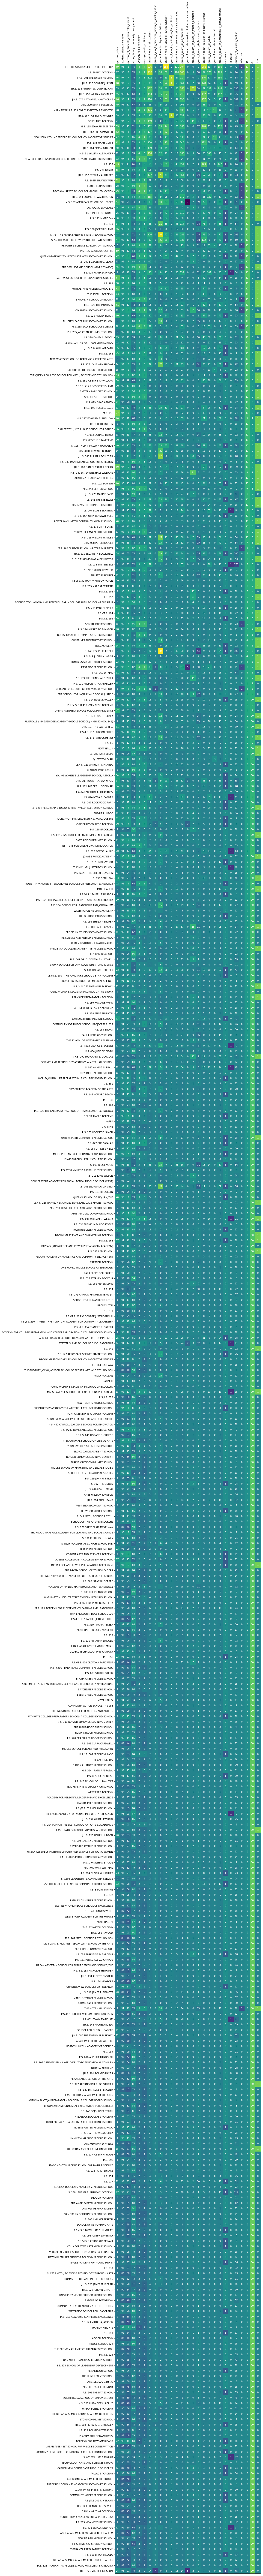

In [17]:
# Plot the results
fig, ax = plt.subplots(figsize=(18,200))
fig.patch.set_facecolor('white')
im = ax.imshow(X_result_weighted_trimmed, cmap='viridis')
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(X_result_weighted_trimmed.columns)))
ax.set_yticks(np.arange(len(X_result_weighted_trimmed.index)))
ax.set_xticklabels(X_result_weighted_trimmed.columns)
labels = X_orig.loc[:,'school_name'].reindex(X_result_weighted_trimmed.index)
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va="center", rotation_mode="anchor")

for i in range(len(X_result_weighted_trimmed.index)):
    for j in range(len(X_result_weighted_trimmed.columns[1:])+1):
        text = ax.text(j, i, "{:n}".format(round(X_predicted.loc[X_result_weighted_trimmed.index[i], X_result_weighted_trimmed.columns[j]], 0)),
                       ha="center", va="center", color="w")
plt.show()

### False Positives
While the full dataset is useful, it is also very large, and it can be useful to examine the instances in which the model gets things wrong.  Particularly the false positives, which the model thinks **should** be high-registering, but for some reason are not.  These are likely to be the most fruitful schools for PASSNYC to consider in its evaluations of candidates.  For this list, the threshhold to be considered a false positive is more than 5 predictions of a `1` for the school in the Repeated Stratified K Fold validation.

In [18]:
# Filter the predictions to just the low-registrants
false_positives = predictions[predictions['true']==0]
# Filter to just those schools that received more than 5 positive predictions, and trim to just this column
false_positives = false_positives[false_positives['1s'] > 5]['1s']
# Combine this result with the full dataset
fp_result = pd.concat([false_positives, X_i], axis=1, join='inner')

# As before, normalize the data and multiply it by the average coefficient
scaled_fp_X = scaler.fit_transform(fp_result.iloc[:,1:])
avg_coefs = np.array(coefs['avg'])
weighted_values = np.multiply(scaled_fp_X, avg_coefs)
# Make a copy of the dataframe, and replace the data columns with the scaled, weighted values
fp_result_weighted = fp_result.copy()
fp_result_weighted.iloc[:, 1:] = weighted_values
# Drop the columns that don't have any evidence of influential values
drop_cols = []
for c in fp_result_weighted.columns:
    if fp_result_weighted[c].max() - fp_result_weighted[c].min() < .5:
        drop_cols.append(c)
fp_result_weighted_trimmed = fp_result_weighted.drop(drop_cols, axis=1)
fp_result_weighted_trimmed.head()

1s  percent_asian  student_attendance_rate  \
40  10.0       0.296573                -0.084709   
39  10.0      -0.059824                 0.136272   
19  10.0       0.296573                 0.246762   
52  10.0       0.360215                -0.305690   
45  10.0       0.143831                 0.025781   

    percent_of_students_chronically_absent  \
40                               -0.074015   
39                                0.172701   
19                                0.313681   
52                               -0.496956   
45                                0.066966   

    strong_family_community_ties_percent  average_ela_proficiency  \
40                             -0.339228                -0.349057   
39                             -0.014435                 0.480899   
19                             -0.258030                 0.617063   
52                             -0.149766                -0.180472   
45                             -0.149766                -0.109148   

    average_math_proficiency  grade_7_ela_4s_all_students  \
40                 -0.253651                    -0.043763   
39                  0.557201                     0.609983   
19                  0.728728                     0.199366   
52                 -0.253651                     0.269603   
45                 -0.011955                     0.145337   

    grade_7_ela_4s_hispanic_or_latino  \
40                           0.145908   
39                          -0.229284   
19                           0.020844   
52                           0.521100   
45                           0.646164   

    grade_7_ela_4s_asian_or_pacific_islander  grade_7_math_4s_all_students  \
40                                  0.028280                      0.219142   
39                                  0.260579                      0.313228   
19                                  0.331279                      0.117215   
52                                  0.472679                      0.219142   
45                                  0.230279                      0.254424   

    grade_7_math_4s_american_indian_or_alaska_native  \
40                                          0.017318   
39                                          0.017318   
19                                          0.017318   
52                                         -0.502216   
45                                          0.017318   

    grade_7_math_4s_asian_or_pacific_islander  in_bronx  in_queens  in_staten  
40                                   0.411689 -0.036992   0.197812     0.0433  
39                                   0.101371 -0.036992  -0.341675     0.0433  
19                                   0.182053 -0.036992  -0.341675     0.0433  
52                                   0.312387 -0.036992  -0.341675     0.0433  
45                                   0.306181 -0.036992  -0.341675     0.0433

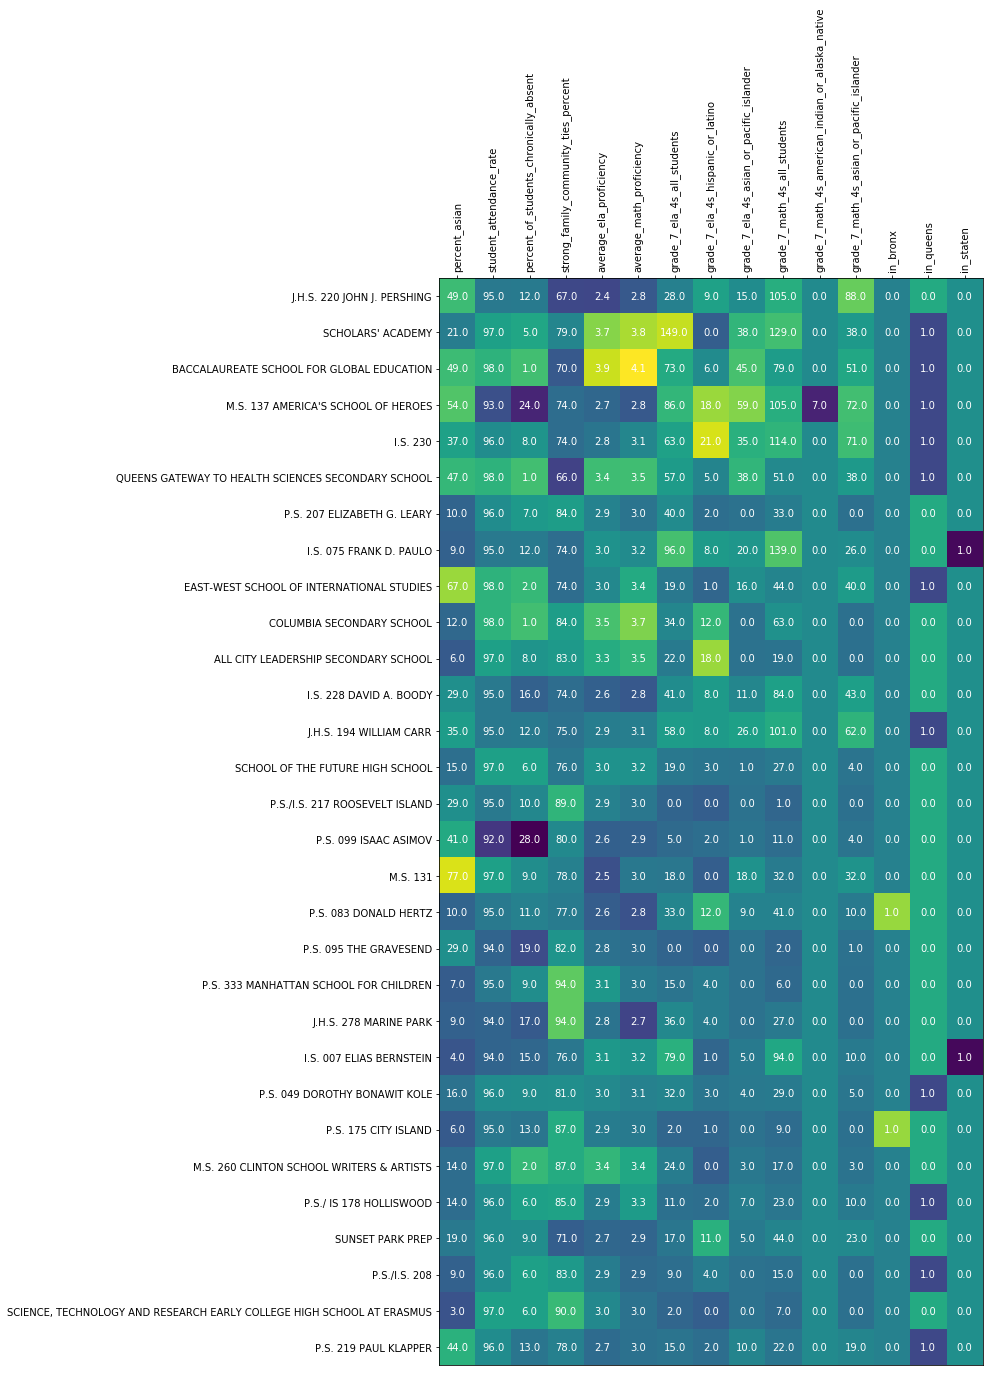

In [19]:
# Plot the False Positives heatmap
fig, ax = plt.subplots(figsize=(18,20))
im = ax.imshow(fp_result_weighted_trimmed.iloc[:,1:], cmap='viridis')
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(fp_result_weighted_trimmed.columns[1:])))
ax.set_yticks(np.arange(len(fp_result_weighted_trimmed.index)))
ax.set_xticklabels(fp_result_weighted_trimmed.columns[1:])
labels = X_orig.loc[:,'school_name'].reindex(fp_result_weighted_trimmed.index)
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va="center", rotation_mode="anchor")

for i in range(len(fp_result_weighted_trimmed.index)):
    for j in range(len(fp_result_weighted_trimmed.columns[1:])):
        text = ax.text(j, i, round(fp_result.loc[fp_result_weighted_trimmed.index[i], fp_result_weighted_trimmed.columns[j+1]], 1),
                       ha="center", va="center", color="w")
plt.show()

While none of these schools surpassed 38% in their SHSAT registrations, the logistic regression model predicted that they would fairly reliably.  For some of them, it appears simply having a relatively high asian population was enough to persuade the model, whicle others had high enough academic scores that it seems unusual they didn't also have a lot of test-takers.  Some of them are quite puzzling - PS 99 Isaac Asimov, for example.  It is not clear why the model should think this school should have high registrations with its abysmal absenteeism, but the nuances of the model's predictions are not always clear.

### False Negatives
Just as it can be helpful to see where the model went wrong in predicting high-registration schools, it can be instructive to see the schools that it thinks are low-registering, but are not.

In [20]:
# Filter the predictions to just the high-registrants
false_negatives = predictions[predictions['true']==1]
# Filter to just those schools that received more than 5 negative predictions, and trim to just this column
false_negatives = false_negatives[false_negatives['0s'] > 5]['0s']
# Combine this result with the full dataset
fn_result = pd.concat([false_negatives, X_i], axis=1, join='inner')

# As before, normalize the data and multiply it by the average coefficient
scaled_fn_X = scaler.fit_transform(fn_result.iloc[:,1:])
weighted_values = np.multiply(scaled_fn_X, avg_coefs)
# Make a copy of the dataframe, and replace the data columns with the scaled, weighted values
fn_result_weighted = fn_result.copy()
fn_result_weighted.iloc[:, 1:] = weighted_values
# Drop the columns that don't have any evidence of influential values
drop_cols = []
for c in fn_result_weighted.columns:
    if fn_result_weighted[c].max() - fn_result_weighted[c].min() < .5:
        drop_cols.append(c)
fn_result_weighted_trimmed = fn_result_weighted.drop(drop_cols, axis=1)
fn_result_weighted_trimmed.head()

0s  percent_asian  student_attendance_rate  \
106   6      -0.168302                 0.066931   
55    6       0.598956                 0.066931   
352   6      -0.143551                 0.066931   
74    6       0.326703                 0.157030   
16    7       0.128701                 0.337229   

     percent_of_students_chronically_absent  \
106                               -0.010950   
55                                 0.180682   
352                                0.180682   
74                                 0.235434   
16                                 0.372315   

     strong_family_community_ties_percent  average_ela_proficiency  \
106                             -0.142200                 0.110286   
55                              -0.050879                 0.269312   
352                              0.086103                 0.081372   
74                               0.086103                 0.160885   
16                               0.040442                 0.695791   

     average_math_proficiency  grade_7_ela_4s_all_students  \
106                 -0.114325                     0.154571   
55                   0.262908                     0.252268   
352                  0.141655                    -0.016399   
74                   0.161864                     0.093510   
16                   0.788340                     0.801814   

     grade_7_ela_4s_hispanic_or_latino  \
106                           0.524657   
55                           -0.209863   
352                          -0.209863   
74                            0.016143   
16                            0.242149   

     grade_7_ela_4s_asian_or_pacific_islander  grade_7_math_4s_all_students  \
106                                  0.019355                      0.004178   
55                                   0.447198                      0.219669   
352                                 -0.087606                      0.019570   
74                                   0.197623                     -0.049695   
16                                   0.482852                      0.766094   

     grade_7_math_4s_american_indian_or_alaska_native  \
106                                          0.015994   
55                                           0.015994   
352                                          0.015994   
74                                           0.015994   
16                                          -0.543790   

     grade_7_math_4s_asian_or_pacific_islander  in_queens  in_staten  \
106                                  -0.040935   0.118252   0.039885   
55                                    0.469020  -0.571553   0.039885   
352                                  -0.089502   0.118252   0.039885   
74                                    0.031916   0.118252   0.039885   
16                                    0.469020   0.118252   0.039885   

       gifted  selective  
106 -0.018498   0.033889  
55  -0.018498   0.033889  
352 -0.018498   0.033889  
74  -0.018498   0.033889  
16  -0.018498  -0.559165

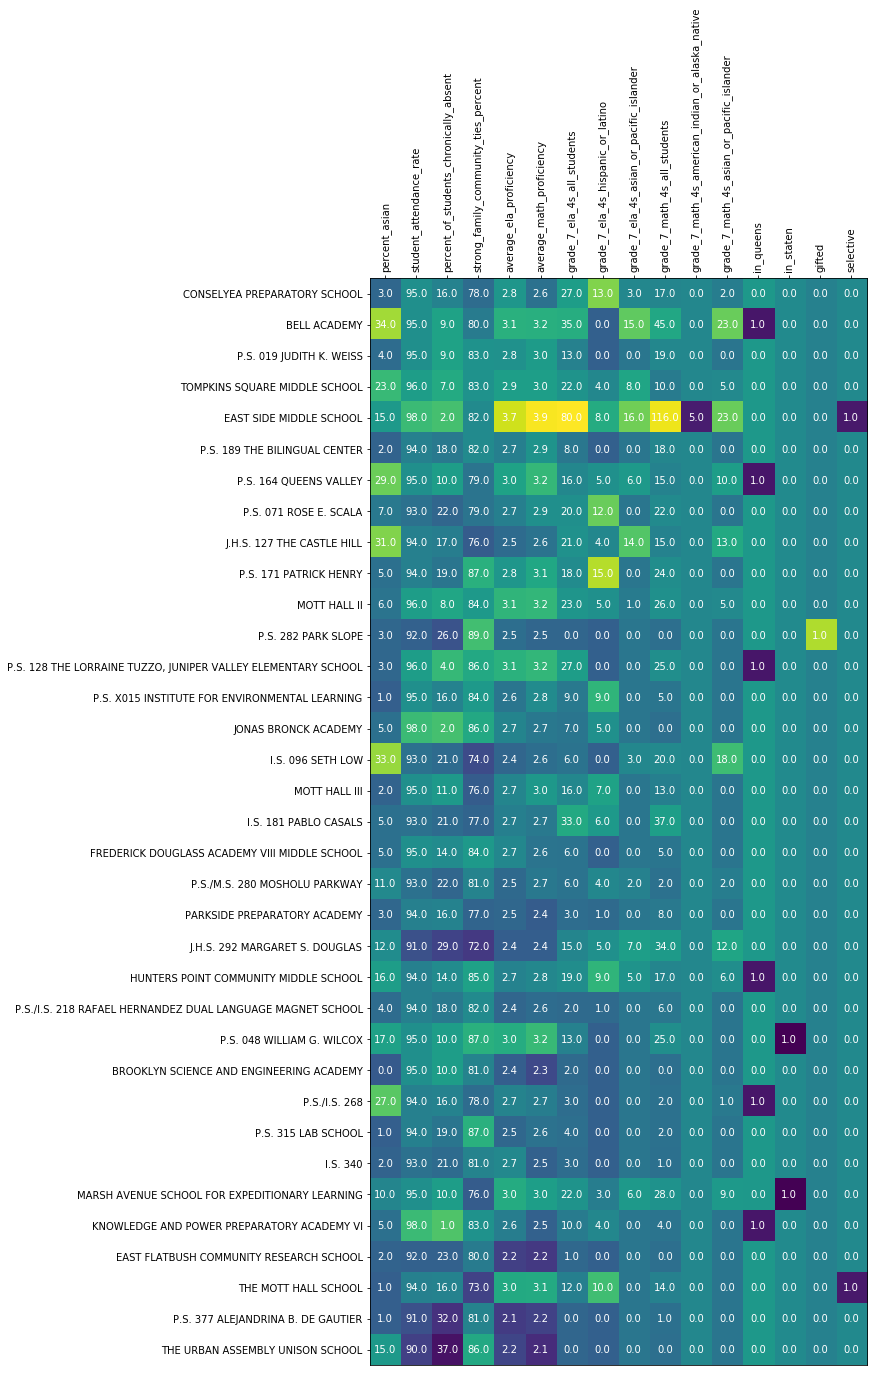

In [21]:
fig, ax = plt.subplots(figsize=(18,20))
im = ax.imshow(fn_result_weighted_trimmed.iloc[:,1:], cmap='viridis')
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(fn_result_weighted_trimmed.columns[1:])))
ax.set_yticks(np.arange(len(fn_result_weighted_trimmed.index)))
ax.set_xticklabels(fn_result_weighted_trimmed.columns[1:])
labels = X_orig.loc[:,'school_name'].reindex(fn_result_weighted_trimmed.index)
ax.set_yticklabels(labels)
#ax.set_yticklabels(fn_result_weighted_trimmed.index)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va="center", rotation_mode="anchor")

for i in range(len(fn_result_weighted_trimmed.index)):
    for j in range(len(fn_result_weighted_trimmed.columns[1:])):
        text = ax.text(j, i, round(fn_result.loc[fn_result_weighted_trimmed.index[i], fn_result_weighted_trimmed.columns[j+1]], 1),
                       ha="center", va="center", color="w")
plt.show()

As before, there some standouts that can cause head-scratching.  East Side Middle School, for example, has all the hallmarks of a high-registering school with its stellar academic scores (and, remember, it is).  However it appears the combination of a handful of high-performing Native Americans and the fact that it is a selective school were enough to relegate it to low-registration, at least most of the time.  Meanwhile, there is nothing in the Urban Assembly Unison School's numbers to explain why it is, in fact, a high-registration school, except maybe its `strong_family_community_ties_percent` score.  But perhaps there is a force within the school that compels students to take the test that is not reflected in the data--a zealous teacher or administrator or parent group, perhaps.  It might be useful for PASSNYC to talk to some of these schools, to see how it is that they manage a high registration rate in apparent contravention of the data.  They might have some useful wisdom to impart.

## Final ranking for PASSNYC
In accordance with the other models in this analysis, we undertake a final evaluation of the schools to determine which have the highest opportunity for engagement with a black and/or hispanic population, and which the model considers to have the highest potential to be high-registration schools.  We write the results to a CSV file for final assembly and reporting.

In [22]:
# Just the columns of interest
final_features = ['dbn',
              'school_name',
              'grade_7_enrollment',
              'num_shsat_test_takers']
# Convert the percent columns to proper floats
pct_features = ['pct_test_takers',
               'percent_black__hispanic']
df_pct = np.multiply(X_orig[pct_features], .01)

# Merge these columns to one DataFrame, along with number of 1 predictions and the true value
df_final = pd.concat([X_orig[final_features], df_pct, predictions['1s'], predictions['true']], axis=1)

# Determine the number of test takers this school would have needed to meet the median percentage of high_registrations
median_pct = np.median(X_orig[y==1]['pct_test_takers'])/100
predicted_test_takers = np.multiply(df_final['grade_7_enrollment'], median_pct)

# Subtract the number of actual test takers from the hypothetical median number
delta = predicted_test_takers - df_final['num_shsat_test_takers']

# Multiply the delta by the minority percentage of the school to estimate how many minority students did not take the test
df_final['minority_delta'] = np.round(np.multiply(delta, df_final['percent_black__hispanic']), 0)

# Multiply the minority delta by the percentage of 1 votes to get a confidence-adjusted 'score', and sort by this.
df_final['score'] = np.multiply(df_final['minority_delta'], df_final['1s']/10)
df_final = df_final.sort_values(by='score', ascending=False)

# Create a rank order column
df_final.insert(0, 'rank', range(1,df_final.shape[0]+1))

# Write to CSV
df_final.to_csv('results/results.logreg.csv')
df_final

rank     dbn                                        school_name  \
108     1  30Q145                           I.S. 145 JOSEPH PULITZER   
107     2  22K278                             J.H.S. 278 MARINE PARK   
56      3  27Q210                     J.H.S. 210 ELIZABETH BLACKWELL   
52      4  27Q137                M.S. 137 AMERICA'S SCHOOL OF HEROES   
45      5  30Q230                                           I.S. 230   
59      6  15K088                            J.H.S. 088 PETER ROUGET   
31      7  24Q005    I.S. 5 - THE WALTER CROWLEY INTERMEDIATE SCHOOL   
40      8  20K220                        J.H.S. 220 JOHN J. PERSHING   
460     9  20K062                                  J.H.S. 062 DITMAS   
35     10  21K281                        I.S. 281 JOSEPH B CAVALLARO   
41     11  30Q227                           I.S. 227 LOUIS ARMSTRONG   
22     12  25Q194                            J.H.S. 194 WILLIAM CARR   
77     13  11X083                              P.S. 083 DONALD HERTZ   
443    14  15K821                                   SUNSET PARK PREP   
432    15  22K207                        P.S. 207 ELIZABETH G. LEARY   
69     16  21K228                            I.S. 228 DAVID A. BOODY   
278    17  17K590            MEDGAR EVERS COLLEGE PREPARATORY SCHOOL   
103    18  08X101                          M.S. X101 EDWARD R. BYRNE   
24     19  25Q237                                           I.S. 237   
47     20  20K227                       J.H.S. 227 EDWARD B. SHALLOW   
46     21  30Q141                              I.S. 141 THE STEINWAY   
63     22  20K223                             J.H.S. 223 THE MONTAUK   
376    23  29Q208                                      P.S./I.S. 208   
30     24  31R075                            I.S. 075 FRANK D. PAULO   
33     25  24Q125                   I.S. 125 THOM J. MCCANN WOODSIDE   
325    26  17K543  SCIENCE, TECHNOLOGY AND RESEARCH EARLY COLLEGE...   
439    27  17K189                      P.S. 189 THE BILINGUAL CENTER   
68     28  25Q189                     J.H.S. 189 DANIEL CARTER BEARD   
73     29  24Q049                      P.S. 049 DOROTHY BONAWIT KOLE   
344    30  32K554               ALL CITY LEADERSHIP SECONDARY SCHOOL   
95     31  11X194                                      P.S./M.S. 194   
26     32  28Q157                       J.H.S. 157 STEPHEN A. HALSEY   
102    33  02M131                                           M.S. 131   
36     34  25Q025                              I.S. 025 ADRIEN BLOCK   
49     35  05M362                          COLUMBIA SECONDARY SCHOOL   
247    36  21K095                             P.S. 095 THE GRAVESEND   
97     37  31R034                               I.S. 034 TOTTENVILLE   
416    38  08X337          THE SCHOOL FOR INQUIRY AND SOCIAL JUSTICE   
266    39  11X175                               P.S. 175 CITY ISLAND   
39     40  27Q323                                  SCHOLARS' ACADEMY   
300    41  21K099                              P.S. 099 ISAAC ASIMOV   
272    42  03M333             P.S. 333 MANHATTAN SCHOOL FOR CHILDREN   
462    43  11X180                  M.S. 180 DR. DANIEL HALE WILLIAMS   
99     44  25Q219                              P.S. 219 PAUL KLAPPER   
364    45  13K492                        ACADEMY OF ARTS AND LETTERS   
70     46  02M413                   SCHOOL OF THE FUTURE HIGH SCHOOL   
11     47  20K259                        J.H.S. 259 WILLIAM MCKINLEY   
54     48  31R007                           I.S. 007 ELIAS BERNSTEIN   
112    49  20K030                   P.S./I.S. 30 MARY WHITE OVINGTON   
44     50  31R072                              I.S. 072 ROCCO LAURIE   
436    51  23K392                                           I.S. 392   
86     52  22K206                             P.S. 206 JOSEPH F LAMB   
62     53  15K443      NEW VOICES SCHOOL OF ACADEMIC & CREATIVE ARTS   
67     54  24Q102                                   P.S. 102 BAYVIEW   
94     55  13K008                            